In [118]:
import warnings
warnings.filterwarnings('ignore')

In [119]:
import numpy as np
import pandas as pd
import math 

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [121]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

In [122]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [123]:
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [124]:
df = pd.read_csv("Dataset2.csv")

In [125]:
df

,Crop,2017,2018,2019,2020,2021
0,rice,308.41,289.22,344.67,397.01,455.17
1,maize,173.32,144.70,134.39,154.82,290.76
2,vegetables,200.08,150.70,300.30,154.80,396.00
3,wheat,109.80,103.00,89.00,113.00,56.00


In [168]:
df.shape

(4, 6)

In [127]:
df.describe()

,2017,2018,2019,2020,2021
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,197.902500,171.905000,217.090000,204.907500,299.482500
std,82.831151,81.035943,124.427889,129.576076,175.986775
min,109.800000,103.000000,89.000000,113.000000,56.000000
25%,157.440000,134.275000,123.042500,144.350000,232.070000
50%,186.700000,147.700000,217.345000,154.810000,343.380000
75%,227.162500,185.330000,311.392500,215.367500,410.792500
max,308.410000,289.220000,344.670000,397.010000,455.170000


In [151]:
X = [0 , 1, 2, 3, 4]
y = df.loc[ df.Crop == "rice" , "2017" : "2021"].to_numpy()

In [152]:
X = np.array(X)

In [153]:
y

array([[308.41, 289.22, 344.67, 397.01, 455.17]])

In [154]:
y = y.reshape(5, 1)

In [146]:
X

array([0, 1, 2, 3, 4, 5])

In [155]:
X = X.reshape(5, 1)

In [148]:
y.shape

(5, 1)

In [149]:
X.shape

(6, 1)

In [156]:
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

reg = svm.SVR(C=0.5 , epsilon=0.01)
reg.fit(X, y)

SVR(C=0.5, epsilon=0.01)

In [157]:
X_test = [5, 6, 7, 8, 9]
X_test = np.array(X_test)

In [158]:
pred = reg.predict(X_test.reshape(5 , 1))

In [159]:
pred

array([345.04076338, 344.74322027, 344.67572222, 344.67016959,
       344.67000187])

In [160]:
Years = ["2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026"]

In [166]:
def calc_pred(Crop):
    X = [0 , 1 , 2 , 3 , 4 ]
    y = df.loc[ df.Crop == Crop , "2017" : "2021" ].to_numpy()
    X = np.array(X)
    y = y.reshape(5 , 1)
    X = X.reshape(5 , 1)
    reg = svm.SVR(C=0.5 , epsilon=0.01)
    reg.fit(X , y ) 
    X_test = [5, 6, 7, 8, 9]
    X_test = np.array(X_test)
    pred = reg.predict(X_test.reshape(5 , 1))
    pred = pred.reshape(5 , 1)
    temp = y.reshape(5 , 1)
    rohit = []
    for i in temp:
        rohit.append(i)
    for i in pred:
        rohit.append(i)
    rohit = np.array(rohit)
    rohit = rohit.reshape(10,)
    Years = ["2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025", "2026" ]
    Years = np.array(Years)
    d = { "Years" : Years , "Prediction" : rohit }
    final = pd.DataFrame(d)
    fig, axes = plt.subplots(1,1)
    fig.set_size_inches(10, 5)
    sns.pointplot(data=final ,x = "Years" ,y = "Prediction", orient="v" )
    fig.savefig("5.png")
    final.to_csv( 'price_prediction.csv' , index = False )
    print(pred)

[[345.04076338]
 [344.74322027]
 [344.67572222]
 [344.67016959]
 [344.67000187]]


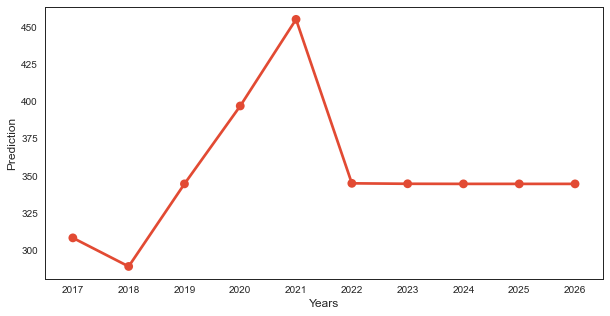

In [167]:
calc_pred("rice")